# Exercises - Continuous Probabilistic Methods

`continuous_probabilistic_methods.py` or `continuous_probabilistic_methods.ipynb` 

In [1]:
###############################################################################
### pthon imports                                                           ###
###############################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [5]:
###############################################################################
### local imports                                                           ###
###############################################################################

#from env import host, user, password
from debug import local_settings, timeifdebug, timeargsifdebug, frame_splain

import acquire as acq

In [55]:
local_settings.splain = True

In [56]:
splain = local_settings.splain

In [90]:
lemons = acq.csv_df('lemonade.csv', splain = False)
lemons.Date = pd.to_datetime(lemons.Date,format='%m/%d/%y')
lemons=acq.check_df(lemons.set_index('Date'), splain=True)

DATAFRAME SHAPE:
(365, 6)

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 6 columns):
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 20.0+ KB
None

DATAFRAME DESCRIPTION:
             count       mean        std   min    25%    50%    75%    max
Temperature  365.0  61.224658  18.085892  15.1  49.70  61.10  71.70  212.0
Rainfall     365.0   0.825973   0.273890   0.4   0.65   0.74   0.91    2.5
Flyers       365.0  40.104110  13.786445 -38.0  31.00  39.00  49.00   80.0
Price        365.0   0.500000   0.000000   0.5   0.50   0.50   0.50    0.5
Sales        365.0  27.589041  29.979680   7.0  20.00  25.00  30.00  534.0

DATAFRAME HEAD:
                  Day  Temperature  Rainfall  Flyers  Price  Sal

<Figure size 864x720 with 0 Axes>

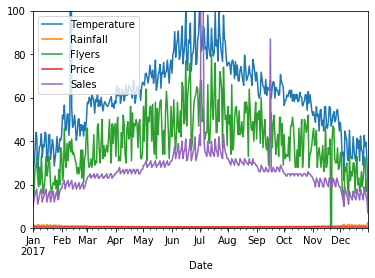

In [105]:
plt.figure(figsize=(12,10))
lemons.plot()
plt.ylim((0,100))
plt.show()

1. Define a function named `get_lower_and_upper_bounds` that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [54]:
def get_lower_and_upper_bounds(s, k=1.5, print_it=False):
    stats = s.describe()
    kvals = pd.Series()
    kvals.rename(stats.name, inplace=True)
    kval = str(k).replace('.','p')
    kvals['q1'] = stats['25%']
    kvals['q2'] = stats['50%']
    kvals['q3'] = stats['75%']
    kvals['iqr'] = kvals['q3'] - kvals['q1']
    kvals['k'] = kval
    kvals['kbdry'] = k * kvals['iqr']
    kvals['lb'] = kvals['q1'] - kvals['kbdry']
    kvals['ub'] = kvals['q3'] + kvals['kbdry']
    if print_it:
        for k in kvals:
            print(f'series {k}: {kvals[k]}')
    return kvals

In [53]:
pd.DataFrame(get_lower_and_upper_bounds(temp, k=1.5, print_it=False)).T
# get_lower_and_upper_bounds(temp, k=1.5, print_it=False)

,q1,q2,q3,iqr,k,kbdry,lb,ub
Temperature,49.7,61.1,71.7,22,1p5,33,16.7,104.7


In [99]:
def get_df_iqr_boundaries(df, k=1.5, print_it=False, splain=splain):
    result = pd.DataFrame(columns=['q1','q2','q3','iqr','k','kbdry','lb','ub'])
    for col in df.columns[df.dtypes != 'object']:
        iqr = pd.DataFrame(get_lower_and_upper_bounds(df[col], k=1.5, print_it=False)).T
        result=result.append(iqr)
    return result

2. Using `lemonade.csv` dataset and focusing on continuous variables:

In [100]:
lemons_k1pf = get_df_iqr_boundaries(lemons, k=1.5, print_it=False, splain=splain)
lemons_k1pf

,q1,q2,q3,iqr,k,kbdry,lb,ub
Temperature,49.7,61.1,71.7,22,1p5,33,16.7,104.7
Rainfall,0.65,0.74,0.91,0.26,1p5,0.39,0.26,1.3
Flyers,31,39,49,18,1p5,27,4,76
Price,0.5,0.5,0.5,0,1p5,0,0.5,0.5
Sales,20,25,30,10,1p5,15,5,45


- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

3. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

- Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columsn from `lemonade.csv`.